<a href="https://colab.research.google.com/github/Vivek-anand-jain/CS235FinalAssignment/blob/master/CS235_Assignment_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the data from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing required library for:
1. Reading CSV (pandas)
2. Preprocessing the data (pandas, numpy)
3. Scatter plot (matlplotlib, seaborn)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
from sklearn.model_selection import train_test_split

Read _train.csv_ from mounted location

In [0]:
data_table = pd.read_csv('/content/drive/My Drive/CS235/train.csv')

Preprocess data:
1. Separate label and pixel
2. Split train and validation (to change the ratio, change the **validate_percentage** variable)

In [0]:
label = data_table['label']
data = data_table.drop("label", axis = 1)  / 255.0
validate_percentage = 0.2 # Update this to vary the portion of train and validate  
X_train, X_validation, y_train, y_validation = train_test_split(data, label, test_size=validate_percentage, random_state=42)
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_validation = X_validation.values.reshape(X_validation.shape[0], 28, 28, 1).astype('float32')

Using PCA to find two major component then plotting scatter plot

Reduced size =  (42000, 2)


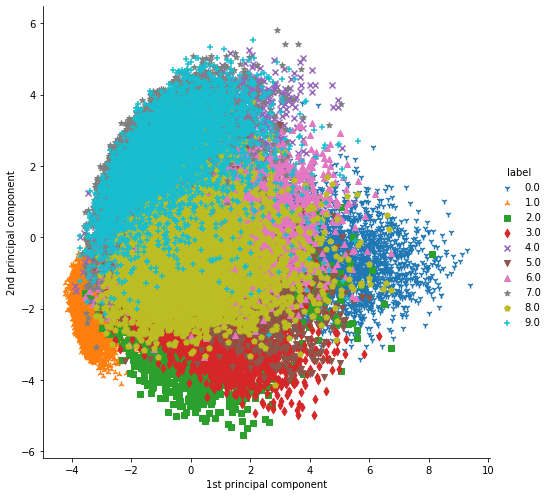

In [5]:
from sklearn import decomposition

# initializing the pca
pca = decomposition.PCA()
pca.n_components = 2# the number of components = 2
pca_data = pca.fit_transform(data)

print("Reduced size = ", pca_data.shape)

marker = {
  "marker": ["1", "2", "s", "d", "x", "v", "^", "*", "p", "+"]
}

X_AXIS = "1st principal component"
Y_AXIS = "2nd principal component"
LABEL = "label"

pca_data = np.vstack((pca_data.T, label)).T # concat the label to each data point
pca_df = pd.DataFrame(data = pca_data, columns = (X_AXIS, Y_AXIS, LABEL))
s.FacetGrid(pca_df, hue = LABEL, height = 7, hue_kws = marker).map(plt.scatter, X_AXIS, Y_AXIS).add_legend()
plt.show()

In [6]:
%tensorflow_version 1.x
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR) # Suppressing tensorflow warning

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, LeakyReLU
from keras.losses import sparse_categorical_crossentropy

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])

Using TensorFlow backend.


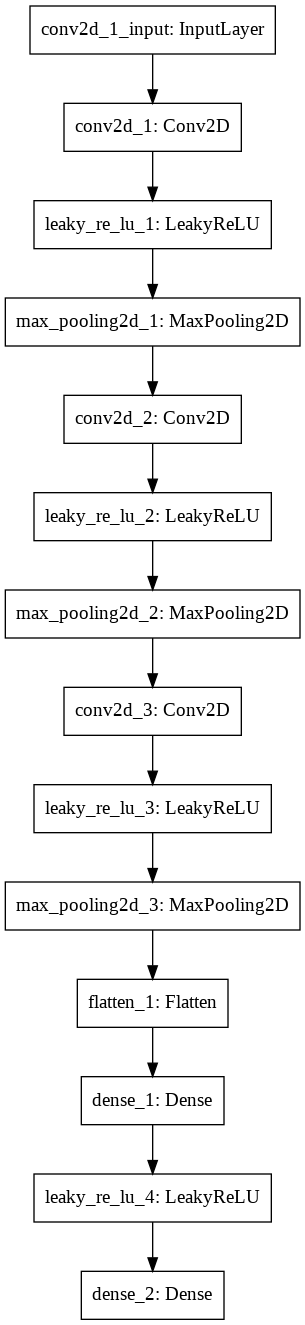

In [7]:
from keras.utils import plot_model
plot_model(model)

Training model on training data and evaluate the loss and accuracy on validation data.  

In [8]:
history = model.fit(x=X_train, y=y_train, epochs=7, verbose = 1 , validation_data=(X_validation, y_validation))

Train on 33600 samples, validate on 8400 samples
Epoch 1/7
33600/33600 [==============================] - 72s 2ms/step - loss: 0.1591 - acc: 0.9493 - val_loss: 0.0549 - val_acc: 0.9832
Epoch 2/7
33600/33600 [==============================] - 71s 2ms/step - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0369 - val_acc: 0.9876
Epoch 3/7
33600/33600 [==============================] - 69s 2ms/step - loss: 0.0345 - acc: 0.9891 - val_loss: 0.0416 - val_acc: 0.9851
Epoch 4/7
33600/33600 [==============================] - 70s 2ms/step - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0478 - val_acc: 0.9856
Epoch 5/7
33600/33600 [==============================] - 70s 2ms/step - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0350 - val_acc: 0.9882
Epoch 6/7
33600/33600 [==============================] - 70s 2ms/step - loss: 0.0174 - acc: 0.9943 - val_loss: 0.0400 - val_acc: 0.9898
Epoch 7/7
33600/33600 [==============================] - 69s 2ms/step - loss: 0.0150 - acc: 0.9955 - val_loss: 0.0586 - val_acc: 0.9823

Plot training & validation accuracy values vs epoch

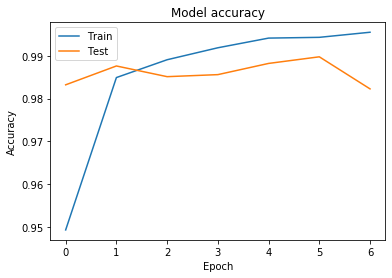

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plot training & validation loss values


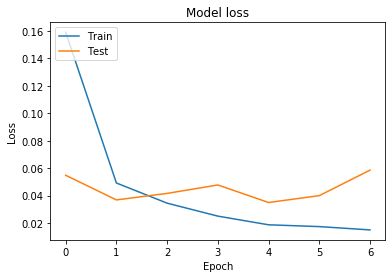

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
_, acc = model.evaluate(X_validation, y_validation)
print("Accuracy with validation data", acc)

8400/8400 [==============================] - 5s 592us/step
Accuracy with validation data 0.9822619047619048


Predict the test values and save the result in the final_submit.csv file

In [0]:
test_data = pd.read_csv('/content/drive/My Drive/CS235/test.csv')
test_data = test_data.values.reshape(test_data.shape[0], 28, 28, 1).astype('float32') / 255.0
ans = model.predict_classes(test_data)
index = range(1, len(test_data) + 1)
df = pd.DataFrame({'ImageId': index, 'Label': ans})
df.to_csv('final_submit.csv', index=False)